# Instalación

Podemos descargar la biblioteca `disops` de `Pypi` e instalarla mediante el gestor de paquetes de `Python`, `pip`, con la siguiente orden:

`pip install disops`

Una vez instalada ya podemos trabajar con ella.

# Demostración práctica

Importamos la biblioteca.

In [1]:
import disops

Ahora tenemos disponibles en este `notebook` las clases `disops.Charlier`, `disops.Meixner`, `disops.Kratchouk` y `disops.Hahn`. Haremos una demostración de las cuatro familias, aunque con explicaciones más pormenorizadas para la primera de ellas.

## Polinomios de Charlier

Creamos un generador de polinomios de Charlier, que no es más que una instancia de la clase `disops.Charlier`. Le indicamos el parámetro $\mu > 0$ del que depende esta familia, por ejemplo $\mu = 1.5$.

In [2]:
ch = disops.Charlier(mu=1.5)

Con la función `print` de `Python` podemos consultar la información de `ch`.

In [3]:
print(ch)

<Chalier Polynomials Generator of variable x and parameter mu=1.5>


### Cálculo de un polinomio

Con el método `gen_poly` generamos el polinomio del grado deseado. Por ejemplo, para grado 2:

In [4]:
ch.gen_poly(2)

Poly(1.0*x**2 - 4.0*x + 2.25, x, domain='RR')

Como podemos observar, el método anterior devuelve el polinomio representado como un objeto de la clase `Poly` de la biblioteca `sympy`. Si queremos simplemente la expresión simbólica, basta con aplicarle el método `as_expr`:

In [5]:
ch.gen_poly(2).as_expr()

1.0*x**2 - 4.0*x + 2.25

El método `gen_poly` utiliza a conveniencia la relación de recurrencia a tres términos (en caso de tener calculados los dos polinomios anteriores) o la fórmula explícita. La primera de las opciones puede hacer que los errores de redondeo cometidos en el cálculo de los polinomios anteriores se propaguen al nuevo. La segunda opción es más "segura", pero también es, en general, computacionalmente más costosa. Si queremos asegurarnos de que se use la fórmula explícita, tendremos que usar el método `sgen_poly`:

In [6]:
ch.sgen_poly(4)

Poly(1.0*x**4 - 12.0*x**3 + 42.5*x**2 - 45.0*x + 5.0625, x, domain='RR')

### Cálculo de la Sucesión de Polinomios Ortogonales

Para generar la sucesión de polinomios de grado menor que uno dado ejecutamos el método `gen_ops`.

In [7]:
ch.gen_ops(5)

[Poly(1.0, x, domain='RR'),
 Poly(1.0*x - 1.5, x, domain='RR'),
 Poly(1.0*x**2 - 4.0*x + 2.25, x, domain='RR'),
 Poly(1.0*x**3 - 7.5*x**2 + 13.25*x - 3.375, x, domain='RR'),
 Poly(1.0*x**4 - 12.0*x**3 + 42.5*x**2 - 45.0*x + 5.0625, x, domain='RR')]

Análogamente a lo que ocurre con `gen_poly`, el método `gen_ops` puede utilizar internamente la relación de recurrencia a tres términos para generar la sucesión. Para asegurarnos de que todos los polinomios se generan con la fórmula explícita, tenemos el método `sgen_ops`.

In [8]:
ch.sgen_ops(5)

[Poly(1.0, x, domain='RR'),
 Poly(1.0*x - 1.5, x, domain='RR'),
 Poly(1.0*x**2 - 4.0*x + 2.25, x, domain='RR'),
 Poly(1.0*x**3 - 7.5*x**2 + 13.25*x - 3.375, x, domain='RR'),
 Poly(1.0*x**4 - 12.0*x**3 + 42.5*x**2 - 45.0*x + 5.0625, x, domain='RR')]

### Comprobación de la pertenencia de un polinomio a la sucesión

El método `check` comprueba si un polinomio pertenece a la suceción. En caso de pertenecer, devuelve su grado y la constante multiplicativa.

Recordemos que si multiplicamos cada polinomio $P_n$ de una sucesión de polinomios ortogonales por una constante $\alpha_n$, la sucesión $\{\alpha_0 P_0, \alpha_1 P_1, \alpha_2 P_2, \dots\}$ sigue siendo ortogonal.

Para utilizar `check`, el primer paso es definir el polinomio que queremos comprobar. Este polinomio debe ser un `Poly` de `sympy`, por lo que importamos esta clase.

In [9]:
from sympy import Poly

El constructor de `Poly` recibe una expresión simbólica, en base a un símbolo `x`, que actúa como variable del polinomo. Podemos crear el símbolo con la clase `Symbol` de `sympy`, mediante la sentencia `x = Symbol('x')`. Sin embargo, también podemos usar el símbolo del que dispone nuestro generador de polinomios de Charlier `ch`, `ch.x`.

In [10]:
p = Poly(3*ch.x**2 - 12*ch.x + 6.75, ch.x)
p

Poly(3.0*x**2 - 12.0*x + 6.75, x, domain='RR')

Ahora ya podemos usar el método check:

In [11]:
ch.check(p)

(2, 3.00000000000000)

La salida la interpretamos como que `p` es el polinomio de grado `2` de la sucesión con constante multiplicativa `3.0`.

Si el polinomio no pertenece a la sucesión la salida es `(-1, 0)`.

In [12]:
q  = Poly(ch.x**2, ch.x)
q

Poly(x**2, x, domain='ZZ')

In [13]:
ch.check(q)

(-1, 0)

### Representación gráfica

El método `plot` dibuja la gráfica de los polinomios de la sucesión de los grados indicados. Por ejemplo, si queremos la gráfica de los primeros 4 polinomios:

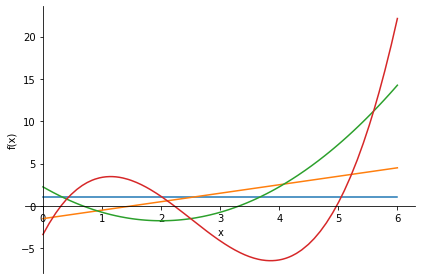

In [14]:
ch.plot(range(4), xlim=(0, 6))

El primer parámetro de `plot` es una lista de los grados de los polinomios que queremos pintar y el segundo, los límites izquierdo y derecho de la gráfica, respectivamente.

### Parámetro simbólico

En ocasiones nos resultará más interesante conocer los polinomios de la sucesión en función de un parámetro genérico, sin darle ningún valor particular. Para ello, definimos un símbolo de `sympy` y se lo pasamos al constructor de la clase `Charlier` como parámetro:

In [15]:
from sympy import Symbol

m = Symbol('m')

ch2 = disops.Charlier(mu=m)

In [16]:
print(ch2)

<Chalier Polynomials Generator of variable x and parameter mu=m>


Sobre `ch2` podremos utilizar todos los métodos que hemos usado anteriormente sobre `ch`, a excepción de `plot`, pues no es posible dibujar la gráfica de un polinomio dependiente de un símbolo.

In [17]:
ch2.gen_poly(4)

Poly(x**4 + (-4*m - 6)*x**3 + (6*m**2 + 12*m + 11)*x**2 + (-4*m**3 - 6*m**2 - 8*m - 6)*x + m**4, x, domain='ZZ[m]')

In [18]:
ch2.gen_ops(6)

[Poly(1, x, domain='ZZ'),
 Poly(x - m, x, domain='ZZ[m]'),
 Poly(x**2 + (-2*m - 1)*x + m**2, x, domain='ZZ[m]'),
 Poly(x**3 + (-3*m - 3)*x**2 + (3*m**2 + 3*m + 2)*x - m**3, x, domain='ZZ[m]'),
 Poly(x**4 + (-4*m - 6)*x**3 + (6*m**2 + 12*m + 11)*x**2 + (-4*m**3 - 6*m**2 - 8*m - 6)*x + m**4, x, domain='ZZ[m]'),
 Poly(x**5 + (-5*m - 10)*x**4 + (10*m**2 + 30*m + 35)*x**3 + (-10*m**3 - 30*m**2 - 55*m - 50)*x**2 + (5*m**4 + 10*m**3 + 20*m**2 + 30*m + 24)*x - m**5, x, domain='ZZ[m]')]

In [19]:
ch2.check(Poly(ch2.x - m, ch2.x))

(1, 1)

### Aprovechamiento de cálculos previos

`disops` guarda los polinimios que calcula. Así, si solicitamos por segunda vez un polinomio calculado anteriormente, no se vuelve a calcular, sino que se devuelve el valor almacenado.

Esto tiene una excepción: si demandamos mediante `sgen_poly` o `sgen_ops` un polinomios que fueron calculados anteriormente con la relación de recurrencia, se recalcularán según la expresión explícita.

Para eliminar de la memoria los polinomios calculados podemos usar el método `clear`:

In [20]:
ch.clear()

Vamos a hacer una comprobación empírica de que, en efecto, la segunda vez que pedimos los mismos polinomios, la biblioteca tarda mucho menos en devolverlos, pues no los tiene que calcular de nuevo. Con la biblioteca `time` medimos los tiempos.

In [21]:
import time

Solicitamos los primeros 30 polinomios por primera vez.

In [22]:
t0 = time.time() # instante de tiempo inmediatemente anterior al cálculo

ch.sgen_ops(30) # cálculo

t1 = time.time() # instande tiempo inmediatemente posterior al cálculo

t1 - t0 # tiempo transcurrido

1.577066421508789

Los volvemos a solicitar:

In [23]:
t0 = time.time()

ch.sgen_ops(30)

t1 = time.time()

t1 - t0

7.987022399902344e-05

Observamos que, evidentemente, la segunda vez ha tardado muchísimo menos tiempo.

### Uso de otra variable

Por defecto, los polinomios se expresan en función del símbolo $x$, pero esto se puede personalizar. Basta con indicar al constructor de la clase `Charlier` el símbolo de `sympy` que queremos utilizar, mediante el parámetro `x`. Por ejemplo, si queremos los polinomios con variable $y$ creamos un nuevo símbolo:

In [24]:
y = Symbol('y')

Y creamos un nuevo generador:

In [25]:
ch3 = disops.Charlier(mu=1.5, x=y)

In [26]:
print(ch3)

<Chalier Polynomials Generator of variable y and parameter mu=1.5>


Calculamos algún polinomio y vemos que se define en función del nuevo símbolo:

In [27]:
ch3.gen_poly(5)

Poly(1.0*y**5 - 17.5*y**4 + 102.5*y**3 - 233.75*y**2 + 173.0625*y - 7.59375, y, domain='RR')

## Polinomios de Meixner

Creamos un generador de polinomios de Meixner con parámetros $\beta = 3.5$ y $c = 0.25$.

In [28]:
meix = disops.Meixner(beta=3.5, c=0.25)

In [29]:
print(meix)

<Meixner Polynomials Generator of variable x and parameters beta=3.5, c=0.25>


Calculamos algunos polinomios:

In [30]:
meix.gen_ops(4)

[Poly(1.0, x, domain='RR'),
 Poly(-0.857142857142857*x + 1.0, x, domain='RR'),
 Poly(0.571428571428571*x**2 - 2.28571428571429*x + 1.0, x, domain='RR'),
 Poly(-0.311688311688312*x**3 + 2.64935064935065*x**2 - 4.90909090909091*x + 1.0, x, domain='RR')]

Graficamos los de grado menor que 7:

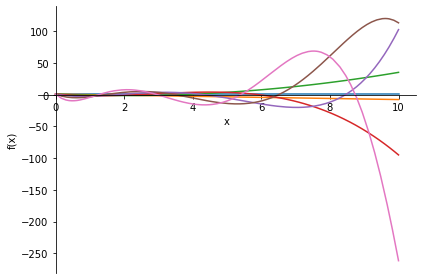

In [31]:
meix.plot(range(7), xlim=(0, 10))

## Polinomios de Hahn

Creamos el generador de los polinomios de Hahn de tamaño $N=10$ y parámatros $\alpha=-0.5$, $\beta=1.5$.

In [32]:
ha = disops.Hahn(N=10, alpha=-0.5, beta=1.5)

In [33]:
print(ha)

<Hahn Polynomials Generator of variable x, size=10 and parameters alpha=-0.5 and beta=1.5>


Calculamos algunos polinomios:

In [34]:
ha.sgen_ops(4)

[Poly(1, x, domain='ZZ'),
 Poly(-0.6*x + 1.0, x, domain='RR'),
 Poly(0.296296296296296*x**2 - 1.8962962962963*x + 1.0, x, domain='RR'),
 Poly(-0.155555555555556*x**3 + 1.8*x**2 - 4.64444444444444*x + 1.0, x, domain='RR')]

Graficamos los polinomios de Hahn de grado entre 5 y 8:

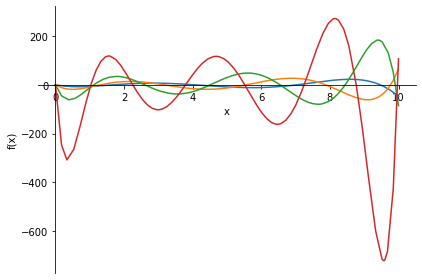

In [35]:
ha.plot(range(5, 9))

## Polinomios de Krawtchouk

Creamos el generador de los polinomios de Krawtchouk de tamaño $N=10$ y parámetro $p = 0.75$.

In [36]:
kraw = disops.Krawtchouk(N=10, p=0.75)

In [37]:
print(kraw)

<Krawtchouk Polynomials Generator of variable x, size=10 and parameter p=0.75>


Calculamos algunos polinomios:

In [38]:
kraw.gen_ops(4)

[Poly(1.0, x, domain='RR'),
 Poly(-0.133333333333333*x + 1.0, x, domain='RR'),
 Poly(0.0197530864197531*x**2 - 0.28641975308642*x + 1.0, x, domain='RR'),
 Poly(-0.00329218106995885*x**3 + 0.0691358024691358*x**2 - 0.465843621399177*x + 1.0, x, domain='RR')]

Y dibujamos su gráfica.

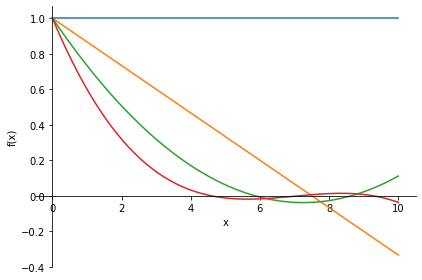

In [39]:
kraw.plot(range(4))